In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_images) # there are 60,000 labels in the training set:

60000

In [ ]:
train_labels  # Each label is an integer between 0 and 9

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape # There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels

(10000, 28, 28)

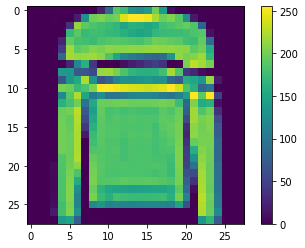

In [ ]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0  # normalizing the values

test_images = test_images / 255.0

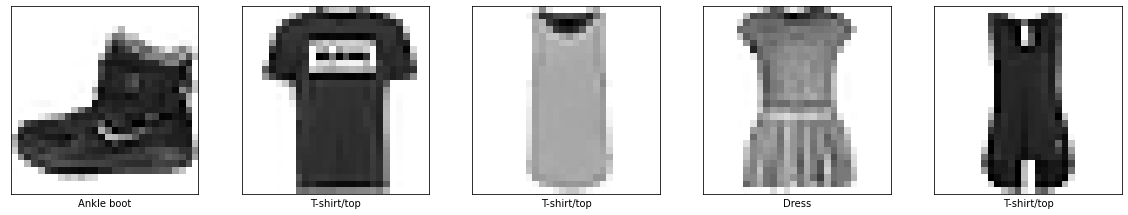

In [ ]:
plt.figure(figsize=(20,20))  # let's display the first 5 images from the training set and display the class name below each image
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # transforms the format of the images from a 2D array (of 28 by 28 px) to a 1D array (of 28 * 28 = 784px)
    tf.keras.layers.Dense(128, activation='relu'), # 128 nodes (or neurons) fully connected layers
    tf.keras.layers.Dense(10)]) # output layers

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # measures how accurate the model is during training, and guide the model to right direction
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=10) # fitting the model to the network that we created now

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5003 - accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3766 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3385 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3152 - accuracy: 0.8831
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2703 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2576 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2499 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3366 - accuracy: 0.8836 - 513ms/epoch - 2ms/step

Test accuracy: 0.8835999965667725


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[3]

array([5.6515863e-09, 9.9999964e-01, 1.5930751e-10, 3.2136671e-07,
       6.4474581e-10, 1.7044278e-15, 2.6840172e-10, 3.4203308e-20,
       9.1797074e-14, 7.8099574e-17], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


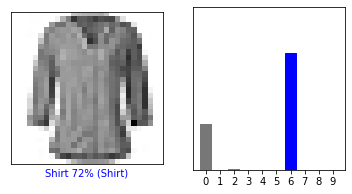

In [ ]:
i = 4 # 4th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red.
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

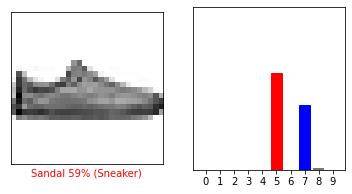

In [ ]:
i = 12 # 12th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red.
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

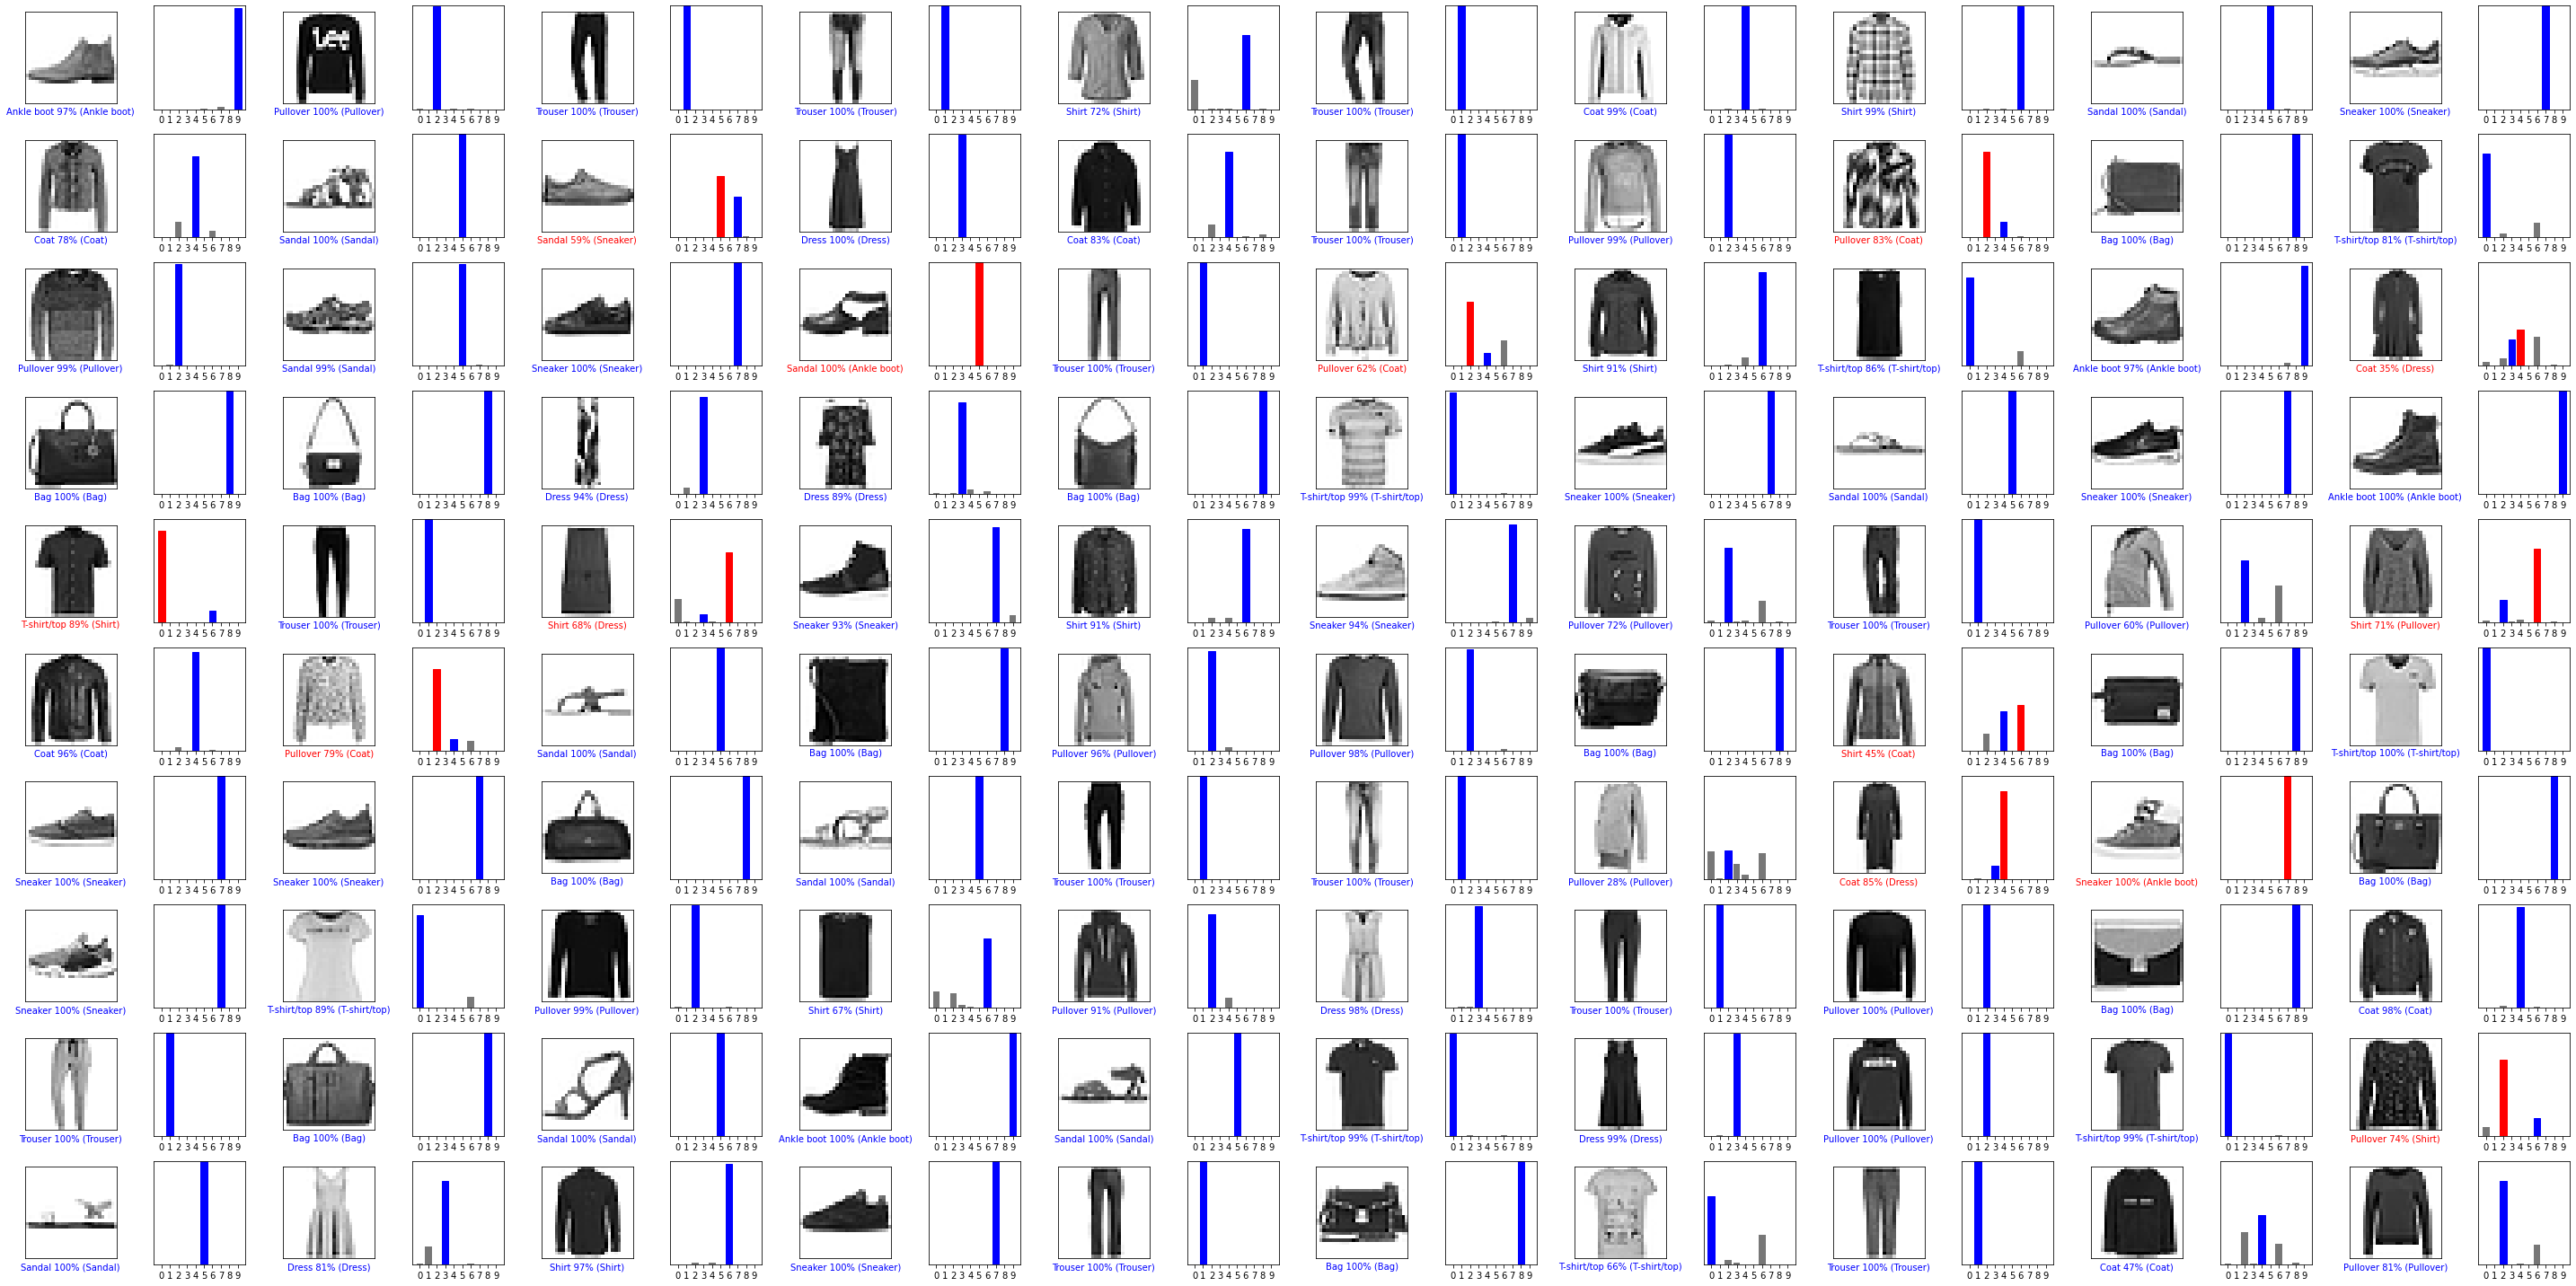

In [ ]:
# X test images, their predicted labels, and the true labels.

num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.7483541e-04 7.4307942e-09 9.9740285e-01 5.8576954e-12 1.9416804e-03
  3.2078378e-11 4.8056501e-04 4.2612059e-14 1.7295668e-09 6.5672652e-13]]


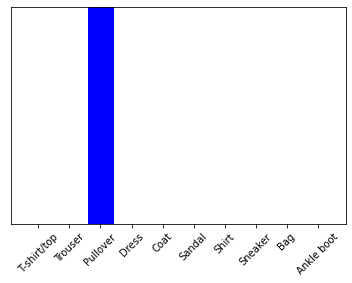

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2